In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import warnings
from pathlib import Path
from v1dd_public import ARTIFACT_DIR
from scipy import stats
from v1dd_public.utils import *
from allen_v1dd.client import OPhysClient
from allen_v1dd.stimulus_analysis import LocallySparseNoise
import statsmodels.stats.multicomp as multi
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
from collections import defaultdict
from scipy.stats import ks_2samp

In [2]:
mouse_ids = ["M409828", "M416296", "M427836", "M438833"]

In [4]:
H5_DIR = Path(f"{ARTIFACT_DIR}/lsn_ns_metrics_240627.h5")
f_events = h5py.File(H5_DIR,'r')
chase_h5_dir = Path(f"{ARTIFACT_DIR}/stimulus_analyses_v2.h5")

In [5]:
mouse_id = 'M427836'
col_vol_str = '23'
plane_name = f"Plane_1"
plane = 2 # there is a mismatch in plane numbers in h5 and client (0-6 vs. 1-5)

In [6]:
f_events[mouse_id][col_vol_str].keys()

<KeysViewHDF5 ['Plane_0', 'Plane_1', 'Plane_2', 'Plane_3', 'Plane_4', 'Plane_5']>

The following analysis (similar to figure 2 notebook is copied from utils.py and simplified for faster analysis.)

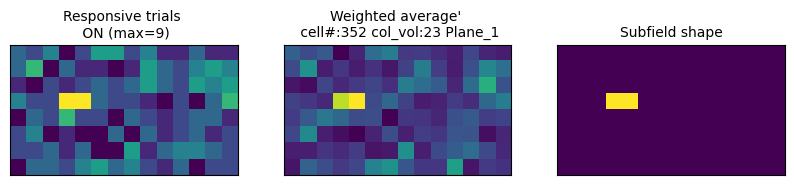

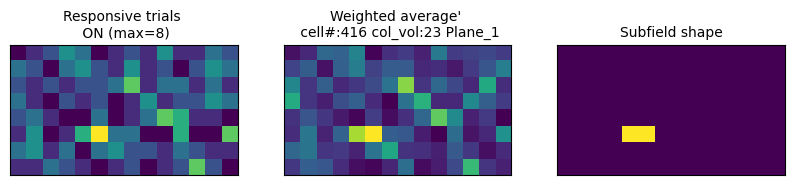

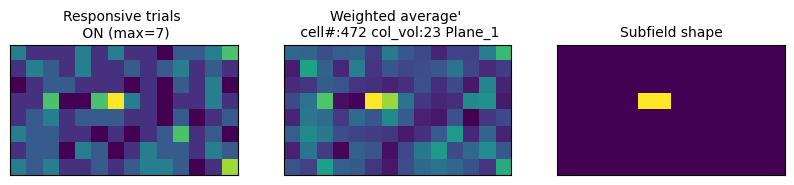

In [6]:
for cell in [352, 416, 472]:

    plane_info_events = f_events[mouse_id][col_vol_str][plane_name]
    n_responsive_trials_on_events = plane_info_events['n_responsive_trials_on']
    n_responsive_trials_off_events = plane_info_events['n_responsive_trials_off']
    responsiveness_score_on_events = plane_info_events['max_n_responsive_trials_on']
    responsiveness_score_off_events = plane_info_events['max_n_responsive_trials_off']
    p_values_events = plane_info_events['p_values']
    sig_on_frames_events = plane_info_events['sig_on_frames']
    sig_off_frames_events = plane_info_events['sig_off_frames']
    max_wavg_on_frames_events = plane_info_events['max_wavg_on_frames']
    max_wavg_off_frames_events = plane_info_events['max_wavg_off_frames']
    lsn_values_events = plane_info_events['lsn_values']
    mu_spont_events = plane_info_events['mu_spont']
    max_spont_events = plane_info_events['max_spont']
    min_spont_events = plane_info_events['min_spont']
    weighted_avg_on_events = plane_info_events['weighted_avg_on']
    weighted_avg_off_events = plane_info_events['weighted_avg_off']
    z_score_mat_on_events = plane_info_events['z_score_mat_on']
    z_score_mat_off_events = plane_info_events['z_score_mat_off']
    is_responsive_events = plane_info_events['is_responsive']
    is_responsive_to_on_events = plane_info_events['is_responsive_to_on']
    is_responsive_to_off_events = plane_info_events['is_responsive_to_off']
    has_on_rf = plane_info_events['has_rf_v2_on']
    has_off_rf = plane_info_events['has_rf_v2_off']

    n_cells = z_score_mat_on_events.shape[0]
    z_score_mat_on_thresholded_events = np.zeros((n_cells, 8, 14))

    for icell in range(n_cells):
        z_score_mat_on_thresholded_events[icell, :, :] = z_score_mat_on_events[icell, :, :] > 2.5

    n_cells = z_score_mat_off_events.shape[0]
    z_score_mat_off_thresholded_events = np.zeros((n_cells, 8, 14))
    z_score_mat_off_thresholded_dff = np.zeros((n_cells, 8, 14))

    for icell in range(n_cells):
        z_score_mat_off_thresholded_events[icell, :, :] = z_score_mat_off_events[icell, :, :] > 2.5
        
    data = z_score_mat_on_events[cell, :, :]
    data1 = data > 2.5
    x_initial, y_initial, gauss_input = find_rf_center_v2(n_responsive_trials_on_events[cell, :], weighted_avg_on_events[cell, :])
    h_initial = gauss_input.max()
    rf_center = np.zeros_like(gauss_input)
    rf_center[x_initial, y_initial] = data1[x_initial, y_initial]
    has_rf = has_on_rf[cell]

    if has_rf:
        fig = plt.figure(figsize = (10, 5))
        font_size = 10

        ax1 = fig.add_subplot(1, 3, 1)
        ax1.imshow(n_responsive_trials_on_events[cell, :, :])
        ax1.set_title(f'Responsive trials \n ON (max={n_responsive_trials_on_events[cell, :, :].max()})', fontsize = 10)
        ax1.set_xticks([])
        ax1.set_yticks([])

        ax2 = fig.add_subplot(1, 3, 2)
        ax2.imshow(weighted_avg_on_events[cell, :, :])
        ax2.set_title(f"Weighted average' \n cell#:{cell} col_vol:{col_vol_str} {plane_name}" , fontsize = font_size)
        ax2.set_xticks([])
        ax2.set_yticks([])

        ax3 = fig.add_subplot(1, 3, 3)
        ax3.imshow(gauss_input)
        ax3.set_title('Subfield shape', fontsize = font_size)
        ax3.set_xticks([])
        ax3.set_yticks([])


In [7]:
n_cells

542

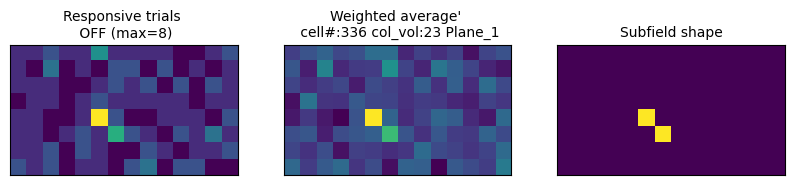

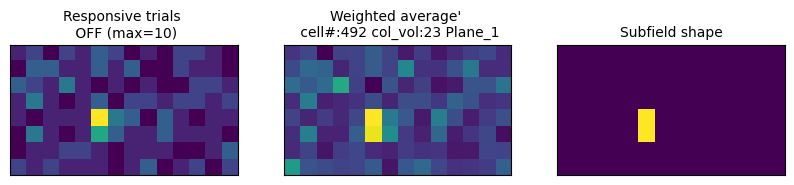

In [8]:
for cell in [336, 492]:
    plane_info_events = f_events[mouse_id][col_vol_str][plane_name]
    n_responsive_trials_on_events = plane_info_events['n_responsive_trials_on']
    n_responsive_trials_off_events = plane_info_events['n_responsive_trials_off']
    responsiveness_score_on_events = plane_info_events['max_n_responsive_trials_on']
    responsiveness_score_off_events = plane_info_events['max_n_responsive_trials_off']
    p_values_events = plane_info_events['p_values']
    sig_on_frames_events = plane_info_events['sig_on_frames']
    sig_off_frames_events = plane_info_events['sig_off_frames']
    max_wavg_on_frames_events = plane_info_events['max_wavg_on_frames']
    max_wavg_off_frames_events = plane_info_events['max_wavg_off_frames']
    lsn_values_events = plane_info_events['lsn_values']
    mu_spont_events = plane_info_events['mu_spont']
    max_spont_events = plane_info_events['max_spont']
    min_spont_events = plane_info_events['min_spont']
    weighted_avg_on_events = plane_info_events['weighted_avg_on']
    weighted_avg_off_events = plane_info_events['weighted_avg_off']
    z_score_mat_on_events = plane_info_events['z_score_mat_on']
    z_score_mat_off_events = plane_info_events['z_score_mat_off']
    is_responsive_events = plane_info_events['is_responsive']
    is_responsive_to_on_events = plane_info_events['is_responsive_to_on']
    is_responsive_to_off_events = plane_info_events['is_responsive_to_off']
    has_on_rf = plane_info_events['has_rf_v2_on']
    has_off_rf = plane_info_events['has_rf_v2_off']

    n_cells = z_score_mat_on_events.shape[0]
    z_score_mat_on_thresholded_events = np.zeros((n_cells, 8, 14))

    for icell in range(n_cells):
        z_score_mat_on_thresholded_events[icell, :, :] = z_score_mat_on_events[icell, :, :] > 2.5

    n_cells = z_score_mat_off_events.shape[0]
    z_score_mat_off_thresholded_events = np.zeros((n_cells, 8, 14))
    z_score_mat_off_thresholded_dff = np.zeros((n_cells, 8, 14))

    for icell in range(n_cells):
        z_score_mat_off_thresholded_events[icell, :, :] = z_score_mat_off_events[icell, :, :] > 2.5
        
    data = z_score_mat_off_events[cell, :, :]
    data1 = data > 2.5
    x_initial, y_initial, gauss_input = find_rf_center_v2(n_responsive_trials_off_events[cell, :], weighted_avg_off_events[cell, :])
    h_initial = gauss_input.max()
    rf_center = np.zeros_like(gauss_input)
    rf_center[x_initial, y_initial] = data1[x_initial, y_initial]
    has_rf = has_off_rf[cell]

    if has_rf:
        fig = plt.figure(figsize = (10, 5))
        font_size = 10

        ax1 = fig.add_subplot(1, 3, 1)
        ax1.imshow(n_responsive_trials_off_events[cell, :, :])
        ax1.set_title(f'Responsive trials \n OFF (max={n_responsive_trials_off_events[cell, :, :].max()})', fontsize = 10)
        ax1.set_xticks([])
        ax1.set_yticks([])

        ax2 = fig.add_subplot(1, 3, 2)
        ax2.imshow(weighted_avg_off_events[cell, :, :])
        ax2.set_title(f"Weighted average' \n cell#:{cell} col_vol:{col_vol_str} {plane_name}" , fontsize = font_size)
        ax2.set_xticks([])
        ax2.set_yticks([])

        ax3 = fig.add_subplot(1, 3, 3)
        ax3.imshow(gauss_input)
        ax3.set_title('Subfield shape', fontsize = font_size)
        ax3.set_xticks([])
        ax3.set_yticks([])


### Plot mean timetraces

In [9]:
plane = 2

In [10]:
DATA_DIR = Path("/home/roozbehf/Documents/v1dd_arefeh/V1_DD_NWBs/")
assert DATA_DIR.exists()
DATA_DIR.resolve()
client =  OPhysClient(DATA_DIR)
session = client.load_ophys_session(f"{mouse_id}_{col_vol_str}")
lsn = LocallySparseNoise(session, plane, trace_type = "events")
traces = session.get_traces(plane, trace_type="dff")
dff = traces.values   
valid_dff = dff[lsn.is_roi_valid, :]
event_traces = session.get_traces(plane, trace_type="events")
event = event_traces.values

In [11]:
valid_dff.shape

(542, 21490)

In [12]:
sample_rate_hz = 6
cond_duration = 1
time_before = -1
time_after = 2
time_after_margin = 1
t_plot = int((cond_duration+time_after+time_before)*sample_rate_hz)
n_trials = 1705
n_cells = valid_dff.shape[0]
n_time_points = 12

dff_trials = np.zeros((n_cells, n_time_points, n_trials))
trial_count = 0
for trial in range(n_trials):   
    trial_start = lsn.stim_table.start[trial]+time_before
    trial_end = lsn.stim_table.end[trial]+time_after
    time_mask = (traces.indexes['time'] > trial_start) & (traces.indexes['time'] < trial_end)
    trial_dff = valid_dff[:, time_mask]
    dff_trials[:, :, trial] = trial_dff[:, :12]
    
dff_trials.shape

(542, 12, 1705)

The following cell took around 13 minutes on my PC

In [13]:
s1, s2 = 8, 14
response_thresh_alpha = 0.05
nstd = 3
onset_delay = -1
offset_delay = 2
sample_spontaneous = 1000
if session is None:
    raise ValueError('Session not found')

all_lsn_vals_in_colvol_plane, all_pvals_in_colvol_plane, cell_indices  = calc_lsn_p_vals_for_col_vol_plane(session,
                                    plane,
                                    sample_spontaneous,
                                    onset_delay,
                                    offset_delay)

design_matrix, trial_template, frame_images = get_plane_lsn_constants(session)
all_x = []
all_y = []
all_depths = []
all_planes = []
all_columns = []
all_volumes = []
all2p3ps = []


lsn = LocallySparseNoise(session, plane, trace_type = "events")

for icell in range(lsn.n_rois_valid):
    roi_mask = session.get_roi_image_mask(plane, icell)
    y1, x1 = np.mean(np.where(roi_mask), axis=1, dtype=int)
    depth = session.get_plane_depth(plane)
    all_x.append(x1)
    all_y.append(y1)
    all_depths.append(depth)
    all_planes.append(plane)
    all_columns.append(session.column_id)
    all_volumes.append(session.volume_id)
    all2p3ps.append(int(session.scope_type[0]))

all_x = np.array(all_x)
all_y = np.array(all_y)    
all_depths = np.array(all_depths)
all_planes = np.array(all_planes)
all_columns = np.array(all_columns)
all_volumes = np.array(all_volumes)
all2p3ps = np.array(all2p3ps)

rf_metrics = {
    "mouse_id": mouse_id,
    "column": session.column_id,            
    "volume": session.volume_id,
    "col_vol": col_vol_str,
    "plane": plane,
    "data": {}
}

if lsn.n_rois_valid > 1:
    n_valid_cells_in_colvol_plane = lsn.n_rois_valid
    n_trials = all_pvals_in_colvol_plane.shape[0]
    
    # initialization
    
    valid_cell_index = np.zeros(n_valid_cells_in_colvol_plane, dtype = int) 
    on_center_x = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_center_y = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_center_h = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_x = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_y = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_h = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_center_wx = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_center_wy = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_wx = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_center_wy = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_area = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_area = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    on_averaged_response_at_receptive_field = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    off_averaged_response_at_receptive_field = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    percentage_res_trial_4_locally_sparse_noise = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    frac_res_trial_4_locally_sparse_noise = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    frac_res_to_on = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)
    frac_res_to_off = np.zeros(n_valid_cells_in_colvol_plane, dtype = float)

    number_of_pixels = int(design_matrix.shape[0]/2) # 112
    number_of_tot_pixels = int(design_matrix.shape[0]/2)*2 # 224
    total_on_off_trials = design_matrix.dot(np.ones(n_trials))

    s1, s2 = 8, 14
    
    lsn_values = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    p_values = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    is_trial_sig = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    total_responsive_trials_all_pixels = np.zeros(n_valid_cells_in_colvol_plane)
    n_responsive_trials = np.zeros((n_valid_cells_in_colvol_plane, number_of_tot_pixels), dtype = int)
    weighted_avg = np.zeros((n_valid_cells_in_colvol_plane, number_of_tot_pixels))
    weighted_avg_only_resp_trials = np.zeros((n_valid_cells_in_colvol_plane, number_of_tot_pixels))
    is_responsive = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    has_rf_mean_std = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    has_rf_chi2 = np.zeros(n_valid_cells_in_colvol_plane)
    chi2_mat_thresholded = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))

    n_responsive_trials_on = np.zeros((n_valid_cells_in_colvol_plane, s1, s2), dtype = int)
    weighted_avg_on = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    weighted_avg_only_resp_trials_on = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    max_n_responsive_trials_on = np.zeros(n_valid_cells_in_colvol_plane, dtype = int)
    is_responsive_to_on = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    has_rf_mean_std_on = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    z_score_mat_on = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    has_rf_zscore_on = np.zeros(n_valid_cells_in_colvol_plane)
    sig_on_frames = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    max_wavg_on_frames = np.zeros((n_valid_cells_in_colvol_plane, n_trials))    
    has_on_rf = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)

    n_responsive_trials_off = np.zeros((n_valid_cells_in_colvol_plane, s1, s2), dtype = int)
    weighted_avg_off = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    weighted_avg_only_resp_trials_off = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    max_n_responsive_trials_off = np.zeros(n_valid_cells_in_colvol_plane, dtype = int)
    is_responsive_to_off = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    has_rf_mean_std_off = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)
    z_score_mat_off = np.zeros((n_valid_cells_in_colvol_plane, s1, s2))
    has_rf_zscore_off = np.zeros(n_valid_cells_in_colvol_plane)
    sig_off_frames = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    max_wavg_off_frames = np.zeros((n_valid_cells_in_colvol_plane, n_trials))
    has_off_rf = np.zeros(n_valid_cells_in_colvol_plane, dtype = bool)

    chi2_mat = chi_square_RFs(all_lsn_vals_in_colvol_plane, trial_template)
    mu_spont = np.mean(all_lsn_vals_in_colvol_plane, 0)
    max_spont = np.max(all_lsn_vals_in_colvol_plane, 0)
    min_spont = np.min(all_lsn_vals_in_colvol_plane, 0)
    
for cell in range(n_valid_cells_in_colvol_plane):
    valid_cell_index[cell] = cell
    lsn_values[cell, :] = all_lsn_vals_in_colvol_plane[:, cell] 
    p_values[cell, :] = all_pvals_in_colvol_plane[:, cell]
    is_trial_sig[cell, :] = all_pvals_in_colvol_plane[:, cell] < response_thresh_alpha
    total_responsive_trials_all_pixels[cell] = is_trial_sig[cell, :].sum() 

    n_responsive_trials[cell, :] = design_matrix.dot(is_trial_sig[cell, :]) # just average
    percentage_res_trial_4_locally_sparse_noise[cell] = total_responsive_trials_all_pixels[cell]*100/is_trial_sig.shape[1]
    frac_res_trial_4_locally_sparse_noise[cell] = total_responsive_trials_all_pixels[cell]/is_trial_sig.shape[1]

    weighted_avg[cell, :] = design_matrix.dot(all_lsn_vals_in_colvol_plane[:, cell]) # weighted average (based on responsiveness score)

    only_resp_trials_design_matrix = design_matrix[:, is_trial_sig[cell, :].astype(bool)]
    lsn_vals_only_resp_trials = all_lsn_vals_in_colvol_plane[is_trial_sig[cell, :].astype(bool), cell]
    weighted_avg_only_resp_trials[cell, :] = only_resp_trials_design_matrix.dot(lsn_vals_only_resp_trials) # weighted average only based on responsive trials (based on responsiveness score)

    is_responsive[cell] = is_cell_responsive(n_responsive_trials[cell, :], weighted_avg[cell, :], min_responsive_trials = 8, nstd = 3)
    has_rf_mean_std[cell] = cell_has_rf(weighted_avg[cell, :], nstd = nstd)
    chi2_mat_thresholded[cell, :, :] = chi2_mat[cell, :, :] < 0.05

    has_rf_chi2[cell] = chi2_mat_thresholded[cell, :, :].sum().astype(bool)

    n_responsive_trials_on[cell, :, :] = n_responsive_trials[cell, :number_of_pixels].reshape(s1, s2)
    total_on_trials = total_on_off_trials[:number_of_pixels].reshape(s1, s2)
    frac_res_to_on[cell] = (n_responsive_trials_on[cell, :, :] / total_on_trials).max()

    on_frame_idxs = np.multiply(design_matrix[n_responsive_trials_on[cell, :, :].argmax()], is_trial_sig[cell, :].T).nonzero()[0]
    sig_on_frames[cell, on_frame_idxs] = 1

    on_wavg_frame_idxs = np.multiply(design_matrix[weighted_avg_on[cell, :, :].argmax()], is_trial_sig[cell, :].T).nonzero()[0]
    max_wavg_on_frames[cell, on_wavg_frame_idxs] = 1

    weighted_avg_on[cell, :, :] = weighted_avg[cell, :number_of_pixels].reshape(s1, s2)
    weighted_avg_only_resp_trials_on[cell, :, :] = weighted_avg_only_resp_trials[cell, :number_of_pixels].reshape(s1, s2)
    max_n_responsive_trials_on[cell] = n_responsive_trials_on[cell, :].max()
    is_responsive_to_on[cell] = is_cell_responsive(n_responsive_trials_on[cell, :], weighted_avg_on[cell, :], min_responsive_trials = 8, nstd = 3)
    has_rf_mean_std_on [cell] = cell_has_rf(weighted_avg_on[cell, :], nstd = nstd)
    z_score_mat_on[cell, :, :], has_rf_zscore_on[cell] = rf_z_test(weighted_avg_on[cell, :])
    on_averaged_response_at_receptive_field[cell] = weighted_avg_on[cell, :, :].max()

    gauss_input = z_score_mat_on[cell, :, :]
    gauss_input_argmax = np.where(gauss_input == gauss_input.max())
    h_initial = gauss_input.max()
    x_initial = gauss_input_argmax[0]
    y_initial = gauss_input_argmax[1]
    on_params = centroid(gauss_input,
                    initial_weight=[x_initial,y_initial,h_initial,1,1])

    on_center_x[cell] = on_params[1]
    on_center_y[cell] = on_params[0]
    on_center_h[cell] = on_params[2]
    on_center_wx[cell] = on_params[4]*4
    on_center_wy[cell] = on_params[3]*4
    on_area[cell] = on_center_wx[cell] * on_center_wy[cell] * on_center_h[cell]
    has_on_rf [cell] = (on_center_wx[cell] < 5) and (on_center_wy[cell] < 5) and h_initial > 2.5

    n_responsive_trials_off[cell, :, :] = n_responsive_trials[cell, number_of_pixels:].reshape(s1, s2)
    total_off_trials = total_on_off_trials[number_of_pixels:].reshape(s1, s2)
    frac_res_to_off[cell] = (n_responsive_trials_off[cell, :, :] / total_off_trials).max()

    off_frame_idxs = np.multiply(design_matrix[n_responsive_trials_off[cell, :, :].argmax()+112], is_trial_sig[cell, :].T).nonzero()[0]
    sig_off_frames [cell, off_frame_idxs] = 1

    off_wavg_frame_idxs = np.multiply(design_matrix[weighted_avg_on[cell, :, :].argmax()+112], is_trial_sig[cell, :].T).nonzero()[0]
    max_wavg_off_frames[cell, off_wavg_frame_idxs] = 1        

    weighted_avg_off[cell, :, :] = weighted_avg[cell, number_of_pixels:].reshape(s1, s2)
    weighted_avg_only_resp_trials_off[cell, :, :] = weighted_avg_only_resp_trials[cell, number_of_pixels:].reshape(s1, s2)  
    max_n_responsive_trials_off [cell] = n_responsive_trials_off[cell, :].max()
    is_responsive_to_off[cell] = is_cell_responsive(n_responsive_trials_off[cell, :], weighted_avg_off[cell, :], min_responsive_trials = 8, nstd = 3)
    has_rf_mean_std_off[cell] = cell_has_rf(weighted_avg_off[cell, :], nstd = nstd)
    z_score_mat_off[cell, :, :], has_rf_zscore_off[cell] = rf_z_test(weighted_avg_off[cell, :])

    off_averaged_response_at_receptive_field[cell] = weighted_avg_off[cell, :, :].max()

    gauss_input = z_score_mat_off[cell, :, :]
    gauss_input_argmax = np.where(gauss_input == gauss_input.max())
    h_initial = gauss_input.max()
    x_initial = gauss_input_argmax[0]
    y_initial = gauss_input_argmax[1]
    off_params = centroid(gauss_input,
                    initial_weight=[x_initial,y_initial,h_initial,1,1])
    off_center_x[cell] = off_params[1]
    off_center_y[cell] = off_params[0]
    off_center_h[cell] = off_params[2]
    off_center_wx[cell] = off_params[4]*4
    off_center_wy[cell] = off_params[3]*4
    off_area[cell] = off_center_wx[cell] * off_center_wy[cell] * off_center_h[cell]
    has_on_rf [cell] = (off_center_wx[cell] < 5) and (off_center_wy[cell] < 5) and h_initial > 2.5 

In [14]:
responsive_rois = []
for roi in range(dff_trials.shape[0]):

    dff_lsn_plot = dff_trials[roi, :, :].T
    mean_tts = []
    sem_tts = []
    for j in range(224):
        ind = lsn.design_matrix[j, :]
        mean_tts.append(np.mean(dff_lsn_plot[ind, :t_plot], axis = 0).tolist())
        sem_tts.append(stats.sem(dff_lsn_plot[ind, :t_plot], axis = 0).tolist())

    mean_tts = np.array(mean_tts)
    sem_tts = np.array(sem_tts)
   
    responsive_rois.append({
        "roi": roi,
        "max_responsive_trials_on": max_n_responsive_trials_on,
        "max_responsive_trials_off": max_n_responsive_trials_off,
        "rf_on": n_responsive_trials_on[roi,:,:],
        "rf_off": n_responsive_trials_off[roi,:,:],
        "mean_tt_on": mean_tts[:lsn.n_pixels, :].reshape([8, 14, 12]),
        "sem_tt_on": sem_tts[:lsn.n_pixels, :].reshape([8, 14, 12]),            
        "mean_tt_off": mean_tts[lsn.n_pixels:, :].reshape([8, 14, 12]),
        "sem_tt_off": sem_tts[lsn.n_pixels:, :].reshape([8, 14, 12])})

In [15]:
len(responsive_rois)

542

In [16]:
def plot_on_off_subfields(responsive_rois, cell):

    max_response = responsive_rois[cell]

    plt.figure(figsize=(16,28))
    plt.subplot(1,2,1)
    
    plt.imshow(max_response["rf_on"], cmap='Reds', vmin=0, vmax=15)
    panel_cnt = 1
    tt_mean_on_response = max_response["mean_tt_on"]
    tt_sem_on_response = max_response["sem_tt_on"]

    max_n_responsive_trials_on = max_response["max_responsive_trials_on"]
    max_n_responsive_trials_off = max_response["max_responsive_trials_off"]
        
    for x_cnt in range(8):
        for y_cnt in range(14):

            lsn_mean = tt_mean_on_response[x_cnt,y_cnt,:]
            lsn_sem = tt_sem_on_response[x_cnt,y_cnt,:]

            scale_x = 1
            scale_y = 3

            plt.fill_between(y_cnt -0.5+np.arange(2/(t_plot+4), (t_plot+2)/(t_plot+4), 1/(t_plot+4)), 
                            x_cnt -scale_y*(lsn_mean-2*lsn_sem),
                            x_cnt -scale_y*(lsn_mean+2*lsn_sem), 
                            facecolor='white')
            plt.plot(y_cnt -0.5 +np.arange(2/(t_plot+4), (t_plot+2)/(t_plot+4), 1/(t_plot+4)),
                    x_cnt -scale_y*lsn_mean, 'black', linewidth=1)

            panel_cnt = panel_cnt + 1
            
    plt.axis('off')

    cbar = plt.colorbar(fraction=0.026)
    cbar.ax.set_ylabel('# Resp Trials')
    plt.title(f"ON Subfield cell#: {cell} \n max # of resp to ON: {max_n_responsive_trials_on[cell]}")
    
    plt.subplot(1,2,2)
    max_response = responsive_rois[cell]
    
    plt.imshow(max_response["rf_off"],cmap = 'Blues', vmin=0, vmax=15)

    panel_cnt = 1
    tt_mean_off_response = max_response["mean_tt_off"]
    tt_sem_off_response = max_response["sem_tt_off"]

    for x_cnt in range(8):
        for y_cnt in range(14):

            lsn_mean = tt_mean_off_response[x_cnt,y_cnt,:]
            lsn_sem = tt_sem_off_response[x_cnt,y_cnt,:]

            scale_x = 1
            scale_y = 3

            plt.fill_between(y_cnt -0.5+np.arange(2/(t_plot+4), (t_plot+2)/(t_plot+4), 1/(t_plot+4)), 
                            x_cnt -scale_y*(lsn_mean-2*lsn_sem),
                            x_cnt -scale_y*(lsn_mean+2*lsn_sem), 
                            facecolor='white')
            plt.plot(y_cnt -0.5 +np.arange(2/(t_plot+4), (t_plot+2)/(t_plot+4), 1/(t_plot+4)),
                    x_cnt -scale_y*lsn_mean, 'black', linewidth=1)

            panel_cnt = panel_cnt + 1
            
    plt.axis('off')

    cbar = plt.colorbar(fraction=0.026)
    cbar.ax.set_ylabel('# Resp Trials')

    plt.title(f"OFF Subfield cell#: {cell} \n max # of resp to OFF: {max_n_responsive_trials_on[cell]}")

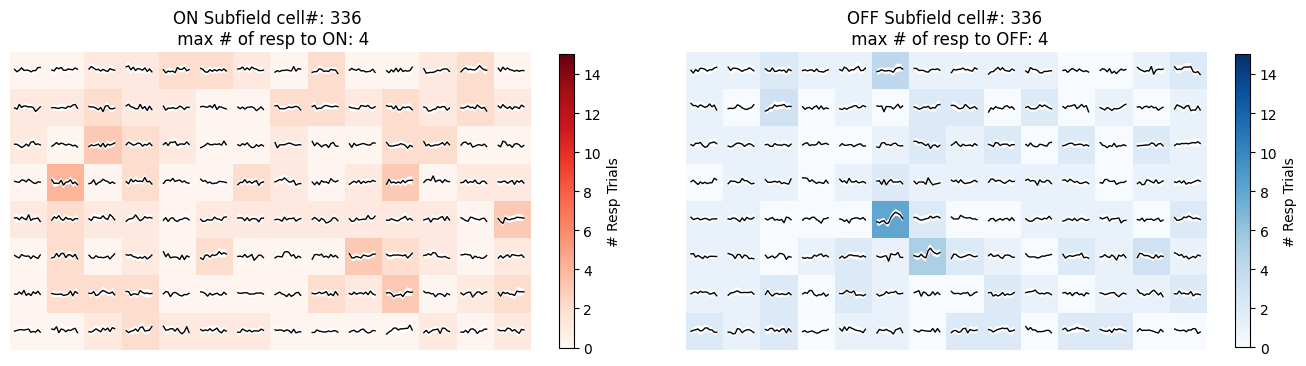

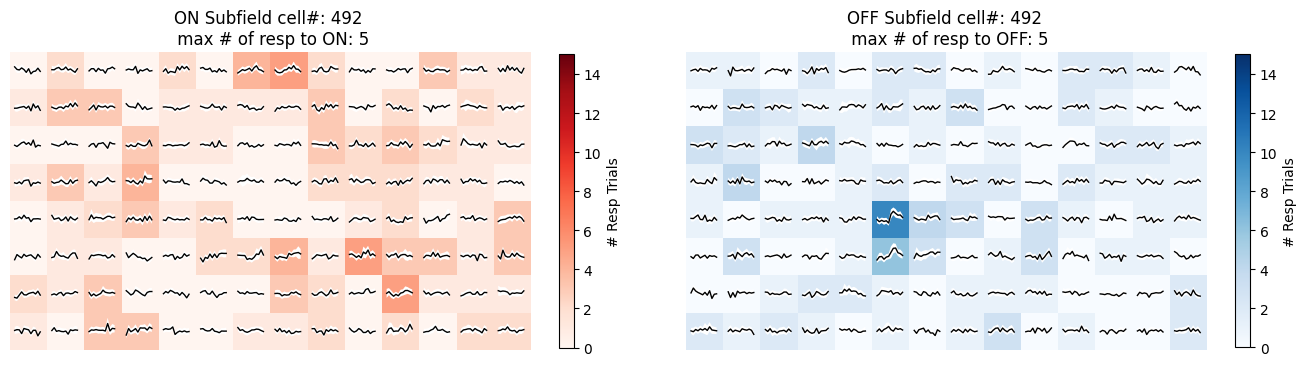

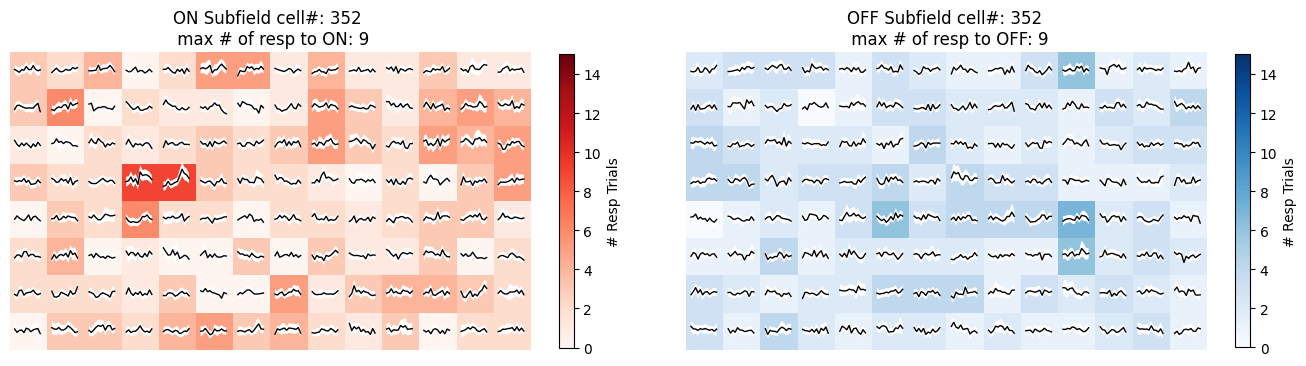

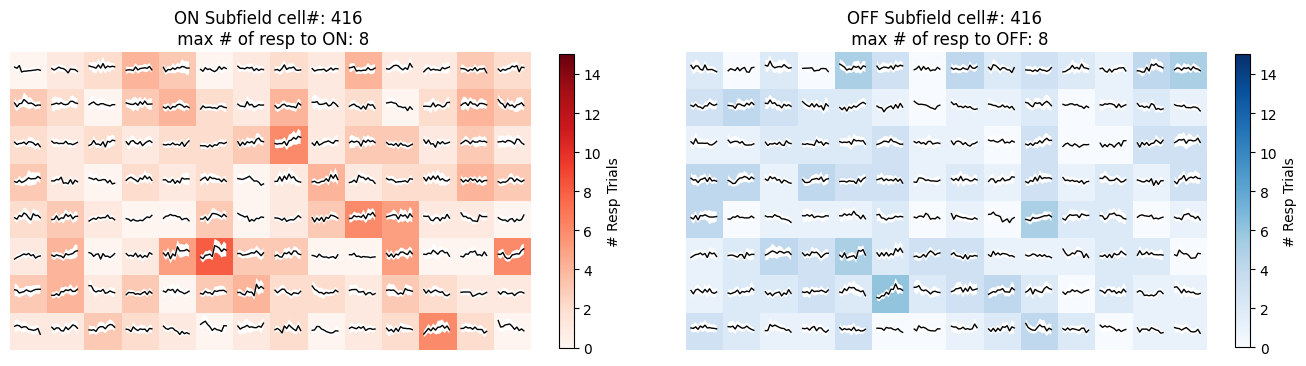

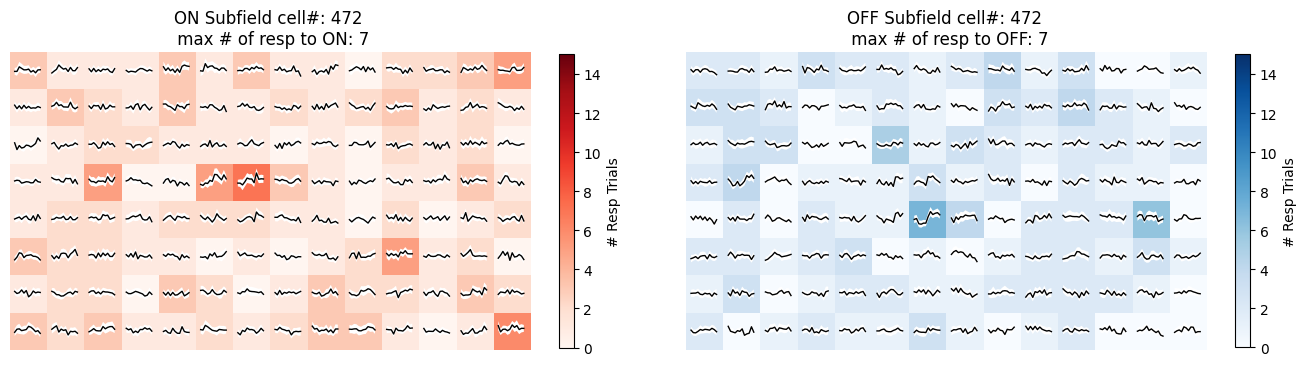

In [17]:
for valid_cell_index in [336, 492, 352, 416, 472]:
    plot_on_off_subfields(responsive_rois, valid_cell_index)

In [18]:
csv_tag = "_240610"

def load_and_preprocess(file_name, mouse_id):
    # remove duplicate neurons
    df = pd.read_csv(ARTIFACT_DIR / file_name, dtype={'column': str, 'volume': str, '2p3p': str, 'valid_not_duplicate': bool}, low_memory=False)
    df.insert(1, 'mouse_id', mouse_id, True)
    
    # remove all cells in the column 1 that are 2P (keeps the 3P)
    df = df[~((df["column"] == '1') & (df["2p3p"] == '2'))]
    df = df[df["valid_not_duplicate"]]
    return df

# Load and preprocess the data
slc2 = load_and_preprocess(f'slc2_all_stim_metrics{csv_tag}.csv', "slc2")
slc4 = load_and_preprocess(f'slc4_all_stim_metrics{csv_tag}.csv', "slc4")
slc5 = load_and_preprocess(f'slc5_all_stim_metrics{csv_tag}.csv', "slc5")
teto1 = load_and_preprocess(f'teto1_all_stim_metrics{csv_tag}.csv', "teto1")
cell_info = pd.concat([slc2, slc4, slc5, teto1], ignore_index=True)

In [19]:
colors = [
    '#FF5733',  # Red
    '#33FF57',  # Green
    '#3357FF',  # Blue
    '#F1C40F',  # Yellow
    '#9B59B6',  # Purple
    'cyan',     # Cyan, named color
    'magenta',  # Magenta, named color
    '#FFC300',  # Gold
    '#DAF7A6',  # Light Green
    '#581845',  # Dark Purple
    '#34495E',  # Asphalt
    '#16A085',  # Green Sea
    '#E74C3C',  # Red Orange
    '#2980B9',  # Belize Hole Blue
    'chocolate' # Chocolate, named color
]

mouse_colors = {'slc2': 'red', 'slc4': 'blue', 'slc5': 'orange', 'teto1': 'green'}
mice = ['slc2', 'slc4', 'slc5', 'teto1']
mouse_ids = ["M409828", "M416296", "M427836", "M438833"]
z_groups_high_to_low = [[650, 675, 700, 725], [575, 600, 625], [500, 525, 550], [482, 498, 514], [434, 450, 466], \
    [386, 402, 418], [338, 354, 370], [290, 306, 322], [242, 258, 274], [194, 210, 226], [146, 162, 178], [98, 114, 130], [50, 66, 82]]

In [20]:
stimuli = ['frac_res_to_on',
        'frac_res_to_off',
        'frac_resp_dgf',
        'frac_resp_dgw',
        'frac_res_to_ns118', # please note the other fraction frac_resp_ns118 is from Chase h5 which is incorrect
        'frac_res_to_ns12', # please note the other fraction frac_resp_ns12 is from Chase h5 which is incorrect
        'frac_resp_nm'
       ]

In [21]:
def perform_anova(filtered_data):

    f_value, p_value = stats.f_oneway(*filtered_data)
    return f_value, p_value

def perform_tukeys_hsd_and_top_pairs(filtered_data):
    all_data = np.concatenate(filtered_data)
    groups = np.concatenate([np.full(len(sublist), i) for i, sublist in enumerate(filtered_data)])
    tukey_result = multi.pairwise_tukeyhsd(all_data, groups, 0.05)
    tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
    significant_pairs = tukey_df[tukey_df['p-adj'] < 0.05]
    significant_pairs_sorted = significant_pairs.sort_values(by='p-adj')


    print("\nTukey's HSD test result:")
    print(tukey_result)
    print(f"\nPairs with p-values < 0.05: {len(significant_pairs_sorted)} found")
    print(significant_pairs_sorted)
    
    return tukey_result, significant_pairs_sorted.to_records(index=False)

### Checking the unusually small %s for teto 1 and slc2

In [22]:
n_stimulus_pairs = 4
n_bootstrap = 1000
n_samples = 50
n_z_groups = len(z_groups_high_to_low)
n_mice = len(mice)
bootstrapped_data = np.zeros((n_stimulus_pairs, n_bootstrap, n_z_groups, n_mice))

for subplot_idx in range(1):   
    for m, mouse_id in enumerate(mice):
 
        for z, z_group in enumerate(z_groups_high_to_low):
                plane = (cell_info['z'].isin(z_group)) & (cell_info['mouse_id']==mice[m])
                plane_df = cell_info[plane]
                
                for b in range(n_bootstrap):
                    sample_indices = np.random.choice(range(len(plane_df)), size=n_samples, replace=True)
                    sample_plane_df = plane_df.iloc[sample_indices]

                    if subplot_idx == 0:
                        stim_plane = (sample_plane_df['has_rf_v2_on'])
                    elif subplot_idx == 1:
                        stim_plane = (sample_plane_df['has_rf_v2_off'])
                    elif subplot_idx == 2:
                        stim_plane = (sample_plane_df['has_rf_v2_off'] | sample_plane_df['has_rf_v2_on'])
                    else:  # subplot_idx == 3
                        stim_plane = (sample_plane_df['has_rf_v2_off']) & (sample_plane_df['has_rf_v2_on'])
                    
                    stim_plane_df = sample_plane_df[stim_plane]
                    
                    if len(stim_plane_df):
                        bootstrapped_data[subplot_idx, b, z, m] = len(stim_plane_df) * 100 / len(sample_plane_df)
                if np.mean(bootstrapped_data[subplot_idx, :, z, m]) < 20:
                    print(f"z={z_group} mouse {mouse_id} %= {np.mean(bootstrapped_data[subplot_idx, :, z, m])} n = {len(plane_df)}")

z=[98, 114, 130] mouse slc4 %= 19.938 n = 2273
z=[194, 210, 226] mouse teto1 %= 17.888 n = 2434
z=[146, 162, 178] mouse teto1 %= 12.672 n = 2137
z=[98, 114, 130] mouse teto1 %= 16.75 n = 1458


In [23]:
n_stimulus_pairs = 4
n_bootstrap = 1000
n_samples = 50
n_z_groups = len(z_groups_high_to_low)
n_mice = len(mice)
bootstrapped_data = np.zeros((n_stimulus_pairs, n_bootstrap, n_z_groups, n_mice))

            
fig = plt.figure(figsize=(21, 7))
fontsize = 14
total_samples_per_group = [0] * len(z_groups_high_to_low)
titles = ["% Neurons with ON RF", "% Neurons with OFF RF", "% Neurons with ON or OFF RFs", "% Neurons with ON and OFF RFs"]

for subplot_idx in range(n_stimulus_pairs):   
    for m, mouse_id in enumerate(mice):
 
        for z, z_group in enumerate(z_groups_high_to_low):
                plane = (cell_info['z'].isin(z_group)) & (cell_info['mouse_id']==mice[m])
                plane_df = cell_info[plane]
                
                for b in range(n_bootstrap):
                    sample_indices = np.random.choice(range(len(plane_df)), size=n_samples, replace=True)
                    sample_plane_df = plane_df.iloc[sample_indices]

                    if subplot_idx == 0:
                        stim_plane = (sample_plane_df['has_rf_v2_on'])
                    elif subplot_idx == 1:
                        stim_plane = (sample_plane_df['has_rf_v2_off'])
                    elif subplot_idx == 2:
                        stim_plane = (sample_plane_df['has_rf_v2_off'] | sample_plane_df['has_rf_v2_on'])
                    else:  # subplot_idx == 3
                        stim_plane = (sample_plane_df['has_rf_v2_off']) & (sample_plane_df['has_rf_v2_on'])
                    
                    stim_plane_df = sample_plane_df[stim_plane]
                    
                    if len(stim_plane_df):
                        bootstrapped_data[subplot_idx, b, z, m] = len(stim_plane_df) * 100 / len(sample_plane_df)

<Figure size 2100x700 with 0 Axes>

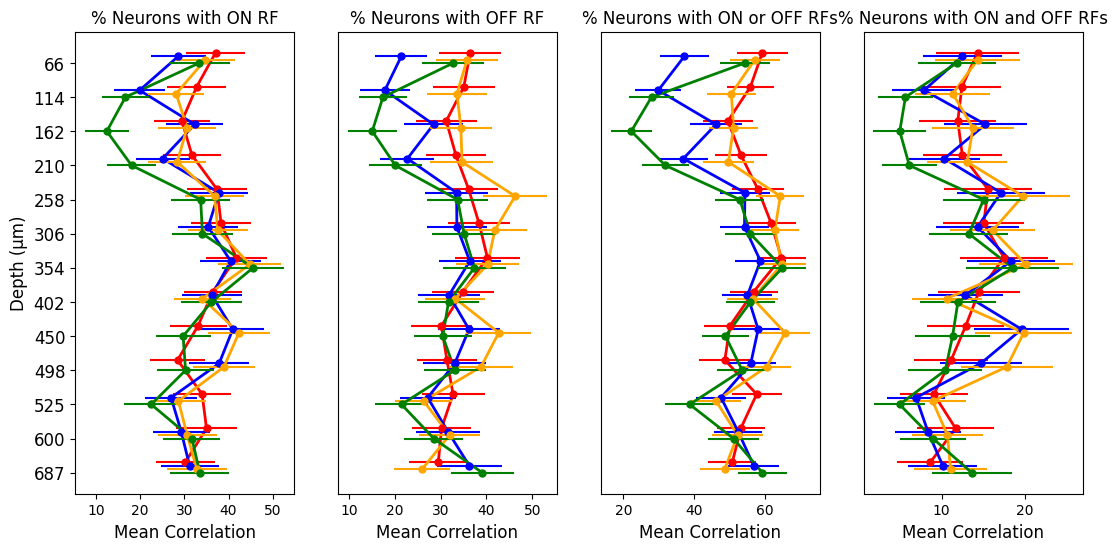

In [24]:
n_stimulus_pairs = 4
jitter_amount = 0.15
num_elements = len(mice)
jitter_step = jitter_amount * 2 / (num_elements - 1)
jitter_values = np.linspace(-jitter_amount, jitter_amount, num_elements)
fixed_jitters = np.tile(jitter_values, (n_z_groups, 1))

fig = plt.figure(figsize=(13, 6))
for s in range(n_stimulus_pairs):
    ax = plt.subplot(1, n_stimulus_pairs, s + 1)
    
    for m, mouse_id in enumerate(mice):
        means = []
        std_errors = []
        mouse_color = mouse_colors[mice[m]]
        
        for z in range(n_z_groups):
            bootstrapped_values = bootstrapped_data[s, :, z, m]
            mean = np.mean(bootstrapped_values)
            std = np.std(bootstrapped_values)
            
            means.append(mean)
            std_errors.append(std)
        base_y_positions = np.arange(1, len(means) + 1)
        jitter = fixed_jitters[:, 3-m]
        y_positions = base_y_positions + jitter
        
        plt.errorbar(means, y_positions, xerr=std_errors, fmt='o', color=mouse_color, ecolor=mouse_color, capsize=0, markersize=5)
        plt.plot(means, y_positions, color=mouse_color, linewidth=2)

        plt.xlabel('Mean Correlation', fontsize=12)
        plt.title(titles[s])
    
    if s == 0:
        y_tick_labels = [np.int(np.mean(group)) for group in z_groups_high_to_low]
        plt.yticks(y_positions, y_tick_labels, fontsize=12)
        plt.ylabel("Depth (µm)", fontsize=12)
    else:
        plt.yticks([])

# plt.show()
# fig.savefig(f"percent neurons_jitter.eps", format='eps')

In [25]:
n_stimulus_pairs = 4
n_bootstrap = 1000
n_samples = 50
n_z_groups = len(z_groups_high_to_low)
n_mice = len(mice)
bootstrapped_data_all_mice = np.zeros((n_stimulus_pairs, n_bootstrap, n_z_groups))

fig = plt.figure(figsize=(21, 7))
fontsize = 14
total_samples_per_group = [0] * len(z_groups_high_to_low)

titles = ["% Neurons with ON RF", "% Neurons with OFF RF", "% Neurons with ON or OFF RFs", "% Neurons with ON and OFF RFs"]

for subplot_idx in range(n_stimulus_pairs):   
 
        for z, z_group in enumerate(z_groups_high_to_low):
                plane = (cell_info['z'].isin(z_group))
                plane_df = cell_info[plane]
                
                for b in range(n_bootstrap):
                    sample_indices = np.random.choice(range(len(plane_df)), size=n_samples, replace=True)
                    sample_plane_df = plane_df.iloc[sample_indices]

                    if subplot_idx == 0:
                        stim_plane = (sample_plane_df['has_rf_v2_on'])
                    elif subplot_idx == 1:
                        stim_plane = (sample_plane_df['has_rf_v2_off'])
                    elif subplot_idx == 2:
                        stim_plane = (sample_plane_df['has_rf_v2_off'] | sample_plane_df['has_rf_v2_on'])
                    else:
                        stim_plane = (sample_plane_df['has_rf_v2_off']) & (sample_plane_df['has_rf_v2_on'])
                    
                    stim_plane_df = sample_plane_df[stim_plane]
                    
                    if len(stim_plane_df):
                        bootstrapped_data_all_mice[subplot_idx, b, z] = len(stim_plane_df) * 100 / len(sample_plane_df)

<Figure size 2100x700 with 0 Axes>

In [26]:
bootstrapped_data_all_mice.shape

(4, 1000, 13)

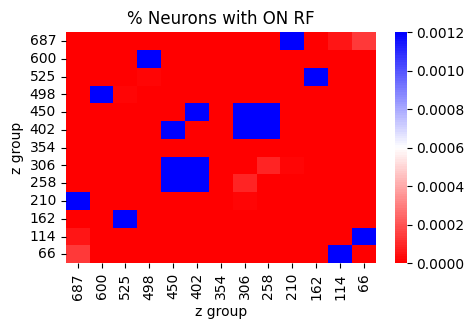

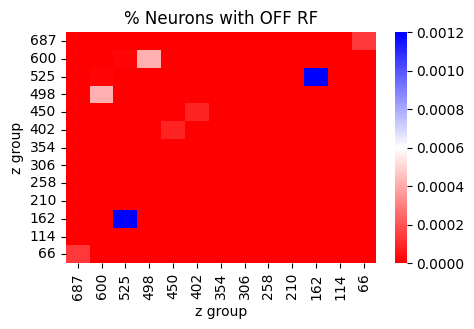

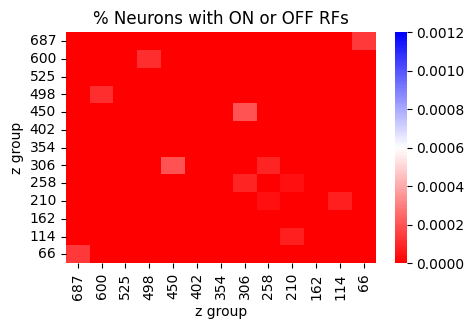

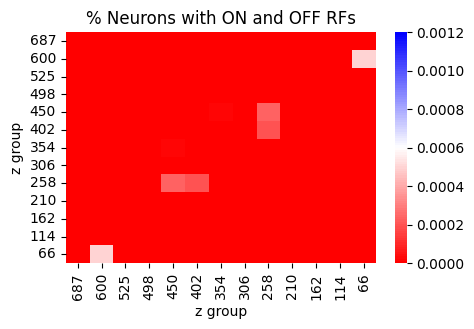

In [29]:
colors = ["red", "white", "blue"]
n_bins = 100
cmap_name = "custom_colormap"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
p_val = 0.0006#0.05/78
vmin, vmax = 0, p_val*2
norm = plt.Normalize(vmin=vmin, vmax=vmax)
p_value_matrix = np.ones((13, 13))
titles = ["% Neurons with ON RF", "% Neurons with OFF RF", "% Neurons with ON or OFF RFs", "% Neurons with ON and OFF RFs"]
y_tick_labels = np.flip(y_tick_labels)

for s in range(4):
    data_to_plot = [bootstrapped_data_all_mice[s, :, z] for z in range(n_z_groups)]
    significant_pairs = []

    # Pairwise Kolmogorov-Smirnov tests
    for i in range(len(data_to_plot)):
        for j in range(i+1, len(data_to_plot)):
            ks_stat, p_value = ks_2samp(data_to_plot[i], data_to_plot[j])

            if p_value < p_val:
                significant_pairs.append((i, j, p_value))
                p_value_matrix[j, i] = p_value
                p_value_matrix[i, j] = p_value

    np.fill_diagonal(p_value_matrix, 0)
    plt.figure(figsize=(5, 3))
    
    p_value_matrix = np.flip(np.flip(p_value_matrix, axis=0), axis=1)

    sns.heatmap(p_value_matrix, annot=False, cmap=cm, norm = norm, cbar=True,
                 xticklabels=y_tick_labels, yticklabels=y_tick_labels)

    plt.title(titles[s])
    plt.xlabel('z group')
    plt.ylabel('z group')
    plt.show()

### Find unique RF shapes

In [30]:
def flood_fill(c, r, mat, visited, threshold):
    """
    Perform flood fill algorithm to find contiguous area of interest.

    Args:
        c (int): Current column index.
        r (int): Current row index.
        mat (np.ndarray): The matrix to fill.
        visited (np.ndarray): Matrix to track visited positions.
        threshold (float): The value above which pixels are considered part of the island.

    Returns:
        None: Modifies `visited` in place.
    """
    rows, cols = mat.shape
    if r < 0 or r >= rows or c < 0 or c >= cols or visited[r, c] or mat[r, c] <= threshold:
        return
    visited[r, c] = True
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]
    for dr, dc in directions:
        flood_fill(c + dc, r + dr, mat, visited, threshold)

def find_rf_center_v3(weighted_avg_events, threshold):
    """
    Find the receptive field (RF) center based on the maximum value and identifies an island of contiguous pixels.
    
    Args:
        weighted_avg_events (np.ndarray): The weighted average events matrix.

    Returns:
        Tuple containing the RF center coordinates and a binary matrix indicating the island around the RF center.
    """
    z_score_mat, has_rf_zscore = rf_z_test(weighted_avg_events)
    max_zscore_pixel = np.where(z_score_mat == z_score_mat.max())
    rf_center_x, rf_center_y = max_zscore_pixel[0][0], max_zscore_pixel[1][0]
    visited = np.zeros_like(z_score_mat, dtype=bool)
    flood_fill(rf_center_y, rf_center_x, z_score_mat, visited, threshold)
    gauss_input = visited.astype(int)

    return rf_center_x, rf_center_y, gauss_input

def translate_shape_to_top_left(arr):
    """Translate the shape to the top-left corner of the array."""
    rows, cols = np.where(arr == 1)
    if len(rows) == 0:
        return arr
    min_row, min_col = np.min(rows), np.min(cols)
    translated = np.zeros_like(arr)
    for row, col in zip(rows, cols):
        translated[row - min_row, col - min_col] = 1
    return translated

def shape_to_tuple(arr):
    """Convert the array shape to a tuple to be stored in a set."""
    return tuple(map(tuple, arr))

def find_unique_shapes(arrays):
    """Find unique shapes in a list of arrays."""
    unique_shapes = set()
    for arr in arrays:
        translated = translate_shape_to_top_left(arr)
        shape_tuple = shape_to_tuple(translated)
        unique_shapes.add(shape_tuple)
    return unique_shapes

def tuple_to_array(shape_tuple, original_shape=(8, 14)):
    shape_array = np.array(shape_tuple).reshape(original_shape)
    return shape_array

def perform_anova(filtered_data):
    f_value, p_value = stats.f_oneway(*filtered_data)
    return f_value, p_value

def perform_tukeys_hsd_and_top_pairs(filtered_data):
    all_data = np.concatenate(filtered_data)
    groups = np.concatenate([np.full(len(sublist), i) for i, sublist in enumerate(filtered_data)])
    tukey_result = multi.pairwise_tukeyhsd(all_data, groups, 0.05)
    tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
    significant_pairs = tukey_df[tukey_df['p-adj'] < 0.05]
    significant_pairs_sorted = significant_pairs.sort_values(by='p-adj')

    print("\nTukey's HSD test result:")
    print(tukey_result)
    print(f"\nPairs with p-values < 0.05: {len(significant_pairs_sorted)} found")
    print(significant_pairs_sorted)
    
    return tukey_result, significant_pairs_sorted.to_records(index=False)

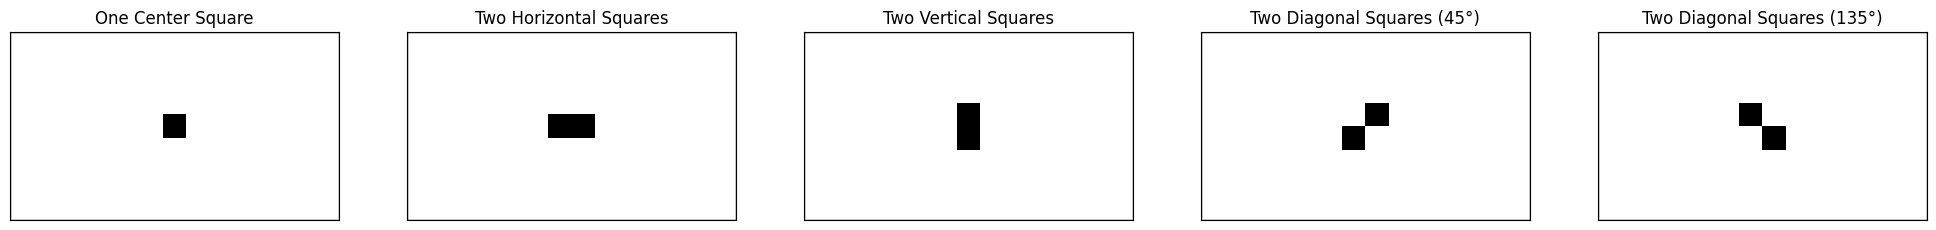

In [31]:
rect_width, rect_height = 14, 8
square_size = 1

def create_rectangle(squares, title, ax):
    ax.add_patch(patches.Rectangle((0, 0), rect_width, rect_height, edgecolor='black', facecolor='none'))
    for square in squares:
        ax.add_patch(patches.Rectangle(square, square_size, square_size, facecolor='black'))
    ax.set_xlim([0, rect_width])
    ax.set_ylim([0, rect_height])
    ax.set_aspect(1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

fig, axs = plt.subplots(1, 5, figsize=(20, 20*rect_height/(5*rect_width)))

# First rectangle: one square in the center
create_rectangle([((rect_width-square_size)/2, (rect_height-square_size)/2)], 'One Center Square', axs[0])

# Second rectangle: two horizontal squares, connected and centered
create_rectangle([((rect_width-2*square_size)/2, (rect_height-square_size)/2),
                  ((rect_width-2*square_size)/2 + square_size, (rect_height-square_size)/2)], 'Two Horizontal Squares', axs[1])

# Third rectangle: two vertical squares, connected and centered
create_rectangle([((rect_width-square_size)/2, (rect_height-2*square_size)/2),
                  ((rect_width-square_size)/2, (rect_height-2*square_size)/2 + square_size)], 'Two Vertical Squares', axs[2])

# Fourth rectangle: two diagonal squares, connected and centered, 45-degree angle
create_rectangle([((rect_width-2*square_size)/2, (rect_height-2*square_size)/2),
                  ((rect_width-2*square_size)/2 + square_size, (rect_height-2*square_size)/2 + square_size)], 'Two Diagonal Squares (45°)', axs[3])

# Fifth rectangle: two diagonal squares, connected and centered, 135-degree angle
create_rectangle([((rect_width-2*square_size)/2, (rect_height-2*square_size)/2 + square_size),
                  ((rect_width-2*square_size)/2 + square_size, (rect_height-2*square_size)/2)], 'Two Diagonal Squares (135°)', axs[4])

plt.tight_layout()
plt.show()


In [32]:
def find_unique_rf_shapes(rf_type, threshold):
    total_cells_count = 0
    cells_with_on_rf_count = 0

    n_rf_pixels = []
    unique_gauss_inputs = set()

    unique_shapes_1_pix = defaultdict(int)
    unique_shapes_2_pix = defaultdict(int)
    unique_shapes_3_pix = defaultdict(int)
    unique_shapes_4_pix = defaultdict(int)

    for mouse_num in range(len(mouse_ids)):
        mouse_id = mouse_ids[mouse_num]
        with h5py.File(H5_DIR, 'r') as h5: 
            col_vols = h5[mouse_id].keys()
            for col_vol_str in col_vols:
                     
                if col_vol_str[0] != "1":
                    col_vol_info = h5[mouse_id][col_vol_str]
                    session_name = f"{mouse_id}_{col_vol_str}"
                    session = client.load_ophys_session(session_name)
                    n_planes = len(session.get_planes())
                
                    for plane_id in range(n_planes):
                        col_vol_info = h5[mouse_id][col_vol_str]
                        plane_name = f"Plane_{plane_id}"
                        
                        if plane_name in col_vol_info:
                            
                            plane_info_events = f_events[mouse_id][col_vol_str][plane_name]

                            if rf_type == "on":
                                has_rf = plane_info_events['has_rf_v2_on']
                                rf_input = plane_info_events['weighted_avg_on']
                            else:
                                has_rf = plane_info_events['has_rf_v2_off']
                                rf_input = plane_info_events['weighted_avg_off']      
                                                         
                            with h5py.File(chase_h5_dir, 'r') as f:
                                if f"{mouse_id}/{col_vol_str}/{plane_name}" in f:  
                                    is_ignored_duplicate_dataset = f[mouse_id][col_vol_str][f"{plane_name}"]["is_ignored_duplicate"]
                                    not_duplicate = ~is_ignored_duplicate_dataset[()]
                                    is_roi_valid = f[mouse_id][col_vol_str][f"{plane_name}"]["is_roi_valid"][()]
                                    valid_indices = np.where(is_roi_valid)[0]
                                    valid_not_duplicate_all = not_duplicate[valid_indices]

                            n_cells = rf_input.shape[0]
                            
                            for cell in range(n_cells): 
                                if valid_not_duplicate_all[cell]:
                                    
                                    total_cells_count += 1

                                    if has_rf[cell]:

                                        cells_with_on_rf_count += 1

                                        x_initial, y_initial, gauss_input = find_rf_center_v3(rf_input[cell, :], threshold)

                                        n_rf_pixels.append(gauss_input.sum())
                                        
                                        if gauss_input.sum() == 4:
                                            translated = translate_shape_to_top_left(gauss_input)
                                            shape_tuple = shape_to_tuple(translated)
                                            unique_shapes_4_pix[shape_tuple] += 1
                                            
                                        if gauss_input.sum() == 3:
                                            translated = translate_shape_to_top_left(gauss_input)
                                            shape_tuple = shape_to_tuple(translated)
                                            unique_shapes_3_pix[shape_tuple] += 1
                                            
                                        if gauss_input.sum() == 2:
                                            translated = translate_shape_to_top_left(gauss_input)
                                            shape_tuple = shape_to_tuple(translated)
                                            unique_shapes_2_pix[shape_tuple] += 1
                                            
                                        if gauss_input.sum() == 1:
                                            translated = translate_shape_to_top_left(gauss_input)
                                            shape_tuple = shape_to_tuple(translated)
                                            unique_shapes_1_pix[shape_tuple] += 1
    
    return unique_shapes_1_pix, unique_shapes_2_pix, unique_shapes_3_pix, unique_shapes_4_pix

The following cell took about 7 minutes on my PC

In [33]:
unique_shapes_1_pix_on, unique_shapes_2_pix_on, unique_shapes_3_pix_on, unique_shapes_4_pix_on = find_unique_rf_shapes(rf_type = "on", threshold = 2.5)
unique_shapes_1_pix_off, unique_shapes_2_pix_off, unique_shapes_3_pix_off, unique_shapes_4_pix_off = find_unique_rf_shapes(rf_type = "off", threshold = 2.5)

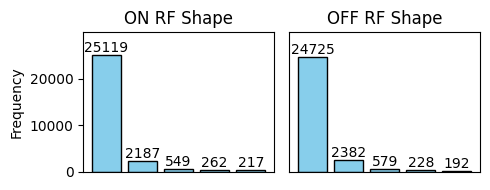

In [34]:
combined_shapes_on = {**unique_shapes_1_pix_on, **unique_shapes_2_pix_on, **unique_shapes_3_pix_on, **unique_shapes_4_pix_on}
combined_shapes_off = {**unique_shapes_1_pix_off, **unique_shapes_2_pix_off, **unique_shapes_3_pix_off, **unique_shapes_4_pix_off}

df_shapes_on = pd.DataFrame(list(combined_shapes_on.items()), columns=['Shape', 'Frequency'])
df_shapes_off = pd.DataFrame(list(combined_shapes_off.items()), columns=['Shape', 'Frequency'])

df_shapes_on = df_shapes_on.sort_values('Frequency', ascending=False)
df_shapes_off = df_shapes_off.sort_values('Frequency', ascending=False)
sorted_combined_shapes_on = {shape: combined_shapes_on[shape] for shape in df_shapes_on['Shape']}
sorted_combined_shapes_off = {shape: combined_shapes_off[shape] for shape in df_shapes_off['Shape']}
plt.figure(figsize=(5, 2))

# ON RF Shape plot
plt.subplot(1, 2, 1)
bars_on = plt.bar(df_shapes_on['Shape'].astype(str).head(5), df_shapes_on['Frequency'].head(5), color='skyblue', edgecolor='black')
plt.ylabel('Frequency', fontsize=10)
plt.title('ON RF Shape', fontsize=12)
plt.xticks([])
plt.yticks(np.arange(0, 26000, 10000), fontsize=10)
plt.ylim([0, 30000])
for bar in bars_on:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom', fontsize=10)

# OFF RF Shape plot
plt.subplot(1, 2, 2)
bars_off = plt.bar(df_shapes_off['Shape'].astype(str).head(5), df_shapes_off['Frequency'].head(5), color='skyblue', edgecolor='black')
plt.title('OFF RF Shape', fontsize=12)
plt.xticks([])
plt.yticks([])
plt.ylim([0, 30000])
for bar in bars_off:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
# plt.savefig('on_off_rf_shapes.eps')


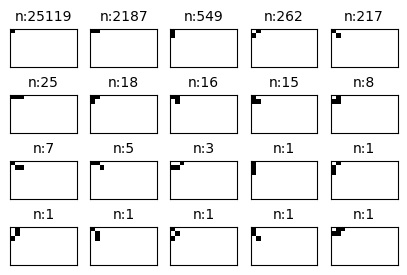

In [35]:
plt.figure(figsize=(5, 5))
for shape_number, (shape_tuple, count) in enumerate(sorted_combined_shapes_on.items(), start=1):
    shape_array = tuple_to_array(shape_tuple)
    shape_array = np.logical_not(shape_array).astype(int)
    plt.subplot(6, 5, shape_number)
    plt.imshow(shape_array, cmap='gray')
    plt.title(f"n:{count}", fontsize=10)
    plt.xticks([])
    plt.yticks([])

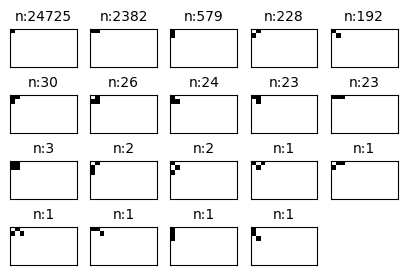

In [36]:
plt.figure(figsize=(5, 5))
for shape_number, (shape_tuple, count) in enumerate(sorted_combined_shapes_off.items(), start=1):
    shape_array = tuple_to_array(shape_tuple)
    shape_array = np.logical_not(shape_array).astype(int)
    plt.subplot(6, 5, shape_number)
    plt.imshow(shape_array, cmap='gray')
    plt.title(f"n:{count}", fontsize=10)
    plt.xticks([])
    plt.yticks([])

In [37]:
data = [(f"Shape {i+1}", count, 1) for i, (shape, count) in enumerate(unique_shapes_1_pix_on.items())] + \
       [(f"Shape {i+1+len(unique_shapes_1_pix_on)}", count, 2) for i, (shape, count) in enumerate(unique_shapes_2_pix_on.items())] + \
       [(f"Shape {i+1+len(unique_shapes_1_pix_on)+len(unique_shapes_2_pix_on)}", count, 3) for i, (shape, count) in enumerate(unique_shapes_3_pix_on.items())] + \
       [(f"Shape {i+1+len(unique_shapes_1_pix_on)+len(unique_shapes_2_pix_on)+len(unique_shapes_3_pix_on)}", count, 4) for i, (shape, count) in enumerate(unique_shapes_4_pix_on.items())]
df_shapes = pd.DataFrame(data, columns=['Shape Number', 'Occurrences', 'Pixel Count'])
df_shapes_sorted = df_shapes.sort_values(by=['Pixel Count', 'Occurrences'], ascending=[True, False])
print(df_shapes_sorted)

   Shape Number  Occurrences  Pixel Count
0       Shape 1        25119            1
2       Shape 3         2187            2
4       Shape 5          549            2
3       Shape 4          262            2
1       Shape 2          217            2
5       Shape 6           25            3
7       Shape 8           18            3
10     Shape 11           16            3
8       Shape 9           15            3
6       Shape 7            8            3
12     Shape 13            7            3
9      Shape 10            5            3
13     Shape 14            3            3
11     Shape 12            1            3
14     Shape 15            1            3
15     Shape 16            1            3
16     Shape 17            1            3
17     Shape 18            1            3
18     Shape 19            1            3
19     Shape 20            1            4


In [38]:
data = [(f"Shape {i+1}", count, 1) for i, (shape, count) in enumerate(unique_shapes_1_pix_off.items())] + \
       [(f"Shape {i+1+len(unique_shapes_1_pix_off)}", count, 2) for i, (shape, count) in enumerate(unique_shapes_2_pix_off.items())] + \
       [(f"Shape {i+1+len(unique_shapes_1_pix_off)+len(unique_shapes_2_pix_off)}", count, 3) for i, (shape, count) in enumerate(unique_shapes_3_pix_off.items())] + \
       [(f"Shape {i+1+len(unique_shapes_1_pix_off)+len(unique_shapes_2_pix_off)+len(unique_shapes_3_pix_off)}", count, 4) for i, (shape, count) in enumerate(unique_shapes_4_pix_off.items())]
df_shapes = pd.DataFrame(data, columns=['Shape Number', 'Occurrences', 'Pixel Count'])
df_shapes_sorted = df_shapes.sort_values(by=['Pixel Count', 'Occurrences'], ascending=[True, False])
print(df_shapes_sorted)

   Shape Number  Occurrences  Pixel Count
0       Shape 1        24725            1
3       Shape 4         2382            2
4       Shape 5          579            2
2       Shape 3          228            2
1       Shape 2          192            2
10     Shape 11           30            3
6       Shape 7           26            3
7       Shape 8           24            3
8       Shape 9           23            3
11     Shape 12           23            3
5       Shape 6            2            3
9      Shape 10            2            3
12     Shape 13            1            3
13     Shape 14            1            3
14     Shape 15            1            3
15     Shape 16            1            3
16     Shape 17            1            3
17     Shape 18            1            3
18     Shape 19            3            4


### ON-OFF center distance

Text(0.5, 1.0, 'ON&OFF RF Center Distance (all FOV)')

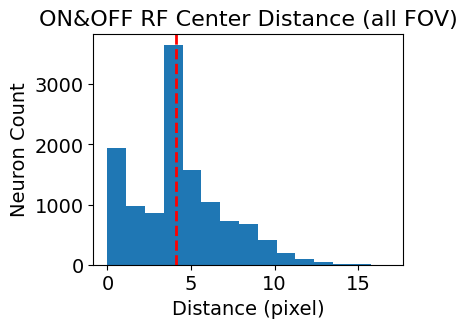

In [39]:
both_on_off = cell_info[(cell_info['has_rf_v2_off']==True) & (cell_info['has_rf_v2_on']==True)]

distance = np.sqrt((both_on_off['on_center_x'] - both_on_off['off_center_x'])**2
    + (both_on_off['on_center_y'] - both_on_off['off_center_y'])**2) 

plt.figure(figsize=(4,3))
plt.hist(distance, bins=15)
plt.axvline(np.median(distance), color='r', linestyle='dashed', linewidth=2)
plt.xlabel("Distance (pixel)", fontsize=14)
plt.ylabel("Neuron Count", fontsize=14)
plt.yticks(np.arange(0, 4000, 1000), fontsize=14)
plt.xticks(fontsize=14)
plt.title("ON&OFF RF Center Distance (all FOV)", fontsize=16)
# plt.savefig('on_off_center_distance.eps', format='eps')

### Per mouse ON-OFF center distance

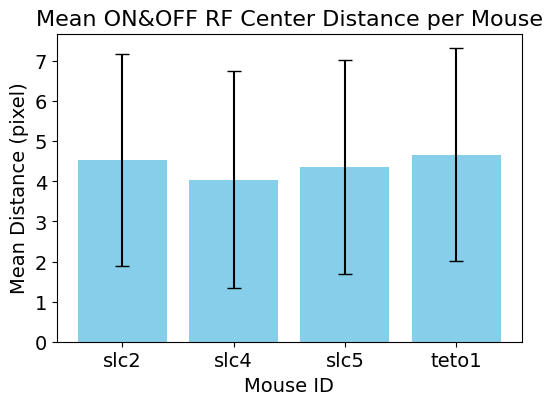

In [40]:
mice = cell_info['mouse_id'].unique()
means = []
stds = []

for mouse in mice:
    both_on_off_mouse = cell_info[(cell_info['has_rf_v2_off'] == True) & 
                                  (cell_info['has_rf_v2_on'] == True) & 
                                  (cell_info['mouse_id'] == mouse)]
    distance = np.sqrt((both_on_off_mouse['on_center_x'] - both_on_off_mouse['off_center_x'])**2 + 
                       (both_on_off_mouse['on_center_y'] - both_on_off_mouse['off_center_y'])**2)
    mean_distance = distance.mean()
    std_distance = distance.std()
    means.append(mean_distance)
    stds.append(std_distance)
    
plt.figure(figsize=(6,4))
plt.bar(mice, means, yerr=stds, capsize=5, color='skyblue')
plt.xlabel('Mouse ID', fontsize=14)
plt.ylabel('Mean Distance (pixel)', fontsize=14)
plt.title('Mean ON&OFF RF Center Distance per Mouse', fontsize=16)
plt.xticks(mice, fontsize=14)
plt.yticks(fontsize=14)
plt.show()


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, -2.5, '−2.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0')])

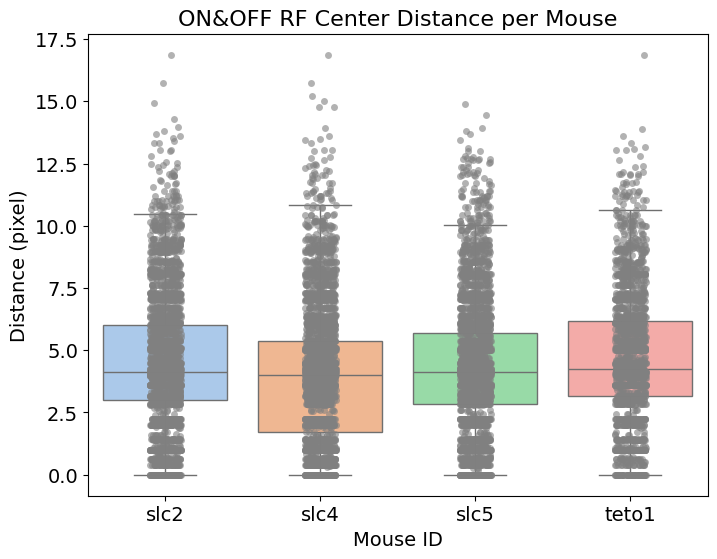

In [41]:
mice = cell_info['mouse_id'].unique()
data = []

for mouse in mice:
    both_on_off_mouse = cell_info[(cell_info['has_rf_v2_off'] == True) & 
                                  (cell_info['has_rf_v2_on'] == True) & 
                                  (cell_info['mouse_id'] == mouse)]
    
    distance = np.sqrt((both_on_off_mouse['on_center_x'] - both_on_off_mouse['off_center_x'])**2 + 
                       (both_on_off_mouse['on_center_y'] - both_on_off_mouse['off_center_y'])**2)
    
    for d in distance:
        data.append({'mouse_id': mouse, 'distance': d})

data_df = pd.DataFrame(data)
plt.figure(figsize=(8,6))
sns.boxplot(x='mouse_id', y='distance', data=data_df, showfliers=False, palette='pastel')
sns.stripplot(x='mouse_id', y='distance', data=data_df, color='gray', alpha=0.6, jitter=True)

plt.xlabel('Mouse ID', fontsize=14)
plt.ylabel('Distance (pixel)', fontsize=14)
plt.title('ON&OFF RF Center Distance per Mouse', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig('on_off_center_distance_mice.eps', format='eps')

The following cell took about x minutes to run on my PC

In [42]:
z_groups = [[482, 498, 514], 
            [434, 450, 466], [386, 402, 418], [338, 354, 370], [290, 306, 322], [242, 258, 274], 
            [194, 210, 226], [146, 162, 178], [98, 114, 130], [50, 66, 82]]

n_stimulus_pairs = 1
n_bootstrap = 1000
n_z_groups = len(z_groups)
n_mice = len(mice)
bootstrapped_data2 = np.zeros((n_bootstrap, n_z_groups, n_mice))

for b in range(n_bootstrap):
    for m, mouse_id in enumerate(mice):
        for z, z_group in enumerate(z_groups):

            on_condition = (cell_info['z'].isin(z_group)) & (cell_info['has_rf_v2_on']==True) & (cell_info['mouse_id'] == mice[m])
            off_condition = (cell_info['z'].isin(z_group)) & (cell_info['has_rf_v2_off']==True) & (cell_info['mouse_id'] == mice[m])
            on = cell_info[on_condition].reset_index(drop=True)
            off = cell_info[off_condition].reset_index(drop=True)  

            on_sample_indices = np.random.choice(range(len(on)), size=50, replace=True)
            off_sample_indices = np.random.choice(range(len(off)), size=50, replace=True)

            on_sampled_x = on.loc[on_sample_indices]
            off_sampled_y = off.loc[off_sample_indices]
            distance = np.sqrt((on_sampled_x['on_center_x'].mean() - off_sampled_y['off_center_x'].mean())**2
                + (on_sampled_x['on_center_y'].mean() - off_sampled_y['off_center_y'].mean())**2)

            bootstrapped_data2[b, z, m] = distance

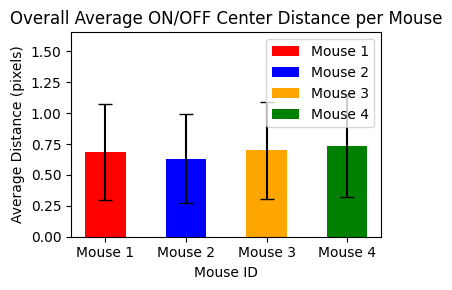

In [43]:
mice = [1, 2, 3, 4]
n_z_groups = 10
n_mice = 4
overall_means = np.mean(bootstrapped_data2, axis=(0, 1))
overall_stds = np.std(bootstrapped_data2, axis=(0, 1))
mouse_colors = {1: 'red', 2: 'blue', 3: 'orange', 4: 'green'}
fig, ax = plt.subplots(figsize=(4, 3))
bar_width = 0.5
indices = np.arange(n_mice)

for i, mouse_id in enumerate(mice):
    ax.bar(indices[i], overall_means[i], width=bar_width, color=mouse_colors[mouse_id],
           yerr=overall_stds[i], capsize=5, label=f'Mouse {mouse_id}')

ax.set_xlabel('Mouse ID')
ax.set_ylabel('Average Distance (pixels)')
ax.set_title('Overall Average ON/OFF Center Distance per Mouse')
ax.set_xticks(indices)
ax.set_xticklabels([f'Mouse {id}' for id in mice])
ax.set_ylim([0, max(overall_means + overall_stds) + 0.5])
ax.legend()
plt.tight_layout()
# fig.savefig(f"on_off_center_pop.eps", format='eps')